# Imports

In [1]:
import os
import errno
from importlib import reload
import pickle 
from pprint import pprint
from itertools import product
from glob import glob
from os.path import basename, splitext, split

In [2]:
import itertools
from numba import jit

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
# just so saved plots aren't also shown
matplotlib.use('Agg')
%matplotlib inline
import seaborn as sns

import pymc3 as pm
import theano as T
import theano.tensor as tt
import arviz as az
import xarray as xr
from json import dump
from os.path import exists, join

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [4]:
from functions.helper_functions import save_trace, load_trace
from functions.data_functions import get_and_clean_data_exp2

In [5]:
from functions.argstrengths import (
    calculate_nonparametric_argstrength, 
    theano_calculate_pragmatic_argstrength, 
    theano_calculate_pragmatic_speaker, 
    calculate_argumentative_strength, 
    calculate_maximin_argstrength
)

from functions.helper_functions import (
    verify, 
    normalize, 
    theano_calculate_pragmatic_speaker,
    get_costs,
    calculate_pragmatic_speaker,
    theano_normalize, 
    theano_softmax
)

In [6]:
from functions.models_variablearray import (
    factory_model_base,
    factory_model_lr_argstrength,
    factory_model_maximin_argstrength,
    factory_model_prag_argstrength,
    factory_model_nonparametric_argstrength,
)

In [7]:
# packages versions
print(
    '\n'.join(
        f'{m.__name__}=={m.__version__}' 
        for m in globals().values() 
        if getattr(m, '__version__', None)
    )
)

pandas==2.2.3
numpy==1.23.5
matplotlib==3.8.4
seaborn==0.13.2
pymc3==3.11.4
theano==1.1.2
arviz==0.12.1
xarray==2023.7.0


In [8]:
folder_exp2_traces = '../../arglang_model_fitting/experiment2_traces'
# where to store the argstrengths, since some of them take a while to compute
# (namely, the ones with full state space)
path_to_argstrengths_folder = './argstrengths/'
folder_exp2_cleaned_data = '../data/data_experiment2/'

In [9]:
folder_exp1_data = '../data/data_experiment1/data.csv'
folder_exp2_data = '../data/data_experiment2/data.csv'

In [10]:
exp1and2_data = get_and_clean_data_exp2(
    pathdata_firstexp=folder_exp1_data,
    pathdata=folder_exp2_data
)
_, data, list_possible_observations, possible_utterances = exp1and2_data

0  were excluded because incompletely recorded
14  of the participants were excluded as they gave more than 4 false responses
113  of the observations in the included participants were excluded because literally false


In [11]:
if exists(folder_exp2_data):
    exp1and2_data = get_and_clean_data_exp2(
        pathdata_firstexp=folder_exp1_data,
        pathdata=folder_exp2_data
    )
    _, data, list_possible_observations, possible_utterances = exp1and2_data
    data.to_csv(join(folder_exp2_cleaned_data, 'cleaned_data_1and2.csv'), index=False)
    with open(join(folder_exp2_cleaned_data, 'obs_1and2.json'),'w') as openfile:
        dump([x.tolist() for x in list_possible_observations], openfile)
    pd.DataFrame(possible_utterances).to_csv(join(folder_exp2_cleaned_data, 'utts.csv'), index=False)
else:
    # read the pre-cleaned data
    data = pd.read_csv(join(folder_exp2_cleaned_data, 'cleaned_data_1and2.csv'))
    list_possible_observations = pd.read_json(join(folder_exp2_cleaned_data, 'obs_1and2.json')).to_numpy()
    with open(join(folder_exp2_cleaned_data, 'obs_1and2.json'), 'r') as openfile:
        y = load(openfile)
    list_possible_observations = [np.array(x) for x in y]
    possible_utterances = pd.read_csv(join(folder_exp2_cleaned_data, 'utts.csv')).to_numpy()

0  were excluded because incompletely recorded
14  of the participants were excluded as they gave more than 4 false responses
113  of the observations in the included participants were excluded because literally false


# Define all models

In [12]:
model_base = factory_model_base(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [13]:
model_lr_argstrength = factory_model_lr_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [14]:
model_maximin_argstrength = factory_model_maximin_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


/Users/heningwang/Documents/GitHub/argumentative_language/analysis/functions/argstrengths.py:148: RuntimeWarning: invalid value encountered in subtract
  return np.nanmin(logp_for-logp_against, 1)


In [15]:
model_prag_argstrength = factory_model_prag_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [16]:
model_nonparametric_argstrength = factory_model_nonparametric_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


# Fit pooled models but saving S1 (don't need to run again if you have stored traces)

Base RSA

In [17]:
with model_base:
    trace_base = pm.sample(
        draws=1000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


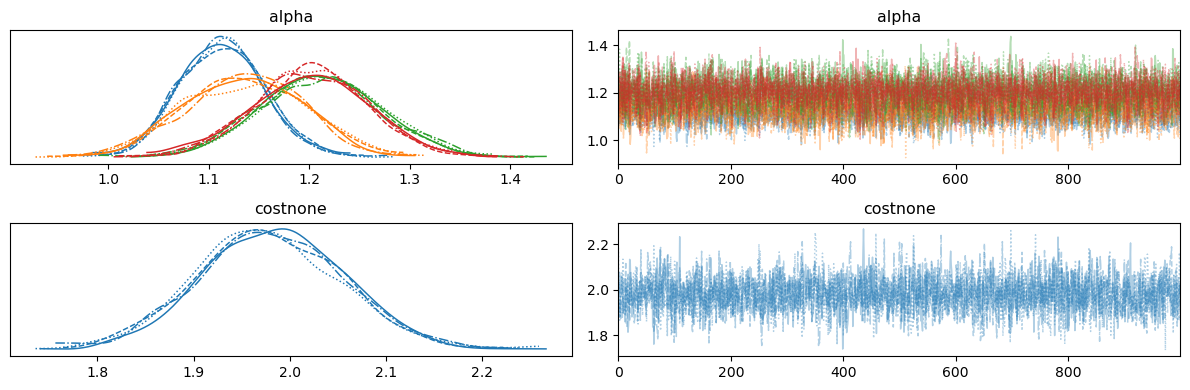

In [18]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_base, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()
plt.show()

In [19]:
save_trace(
    'base', 
    trace_base,
    path_to_folder=folder_exp2_traces
)

Log-likelihood ratio argstrength RSA

In [20]:
with model_lr_argstrength:
    trace_lr_argstrength = pm.sample(
        draws=1000,
        tune=1000,
        # target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy v

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 128 seconds.


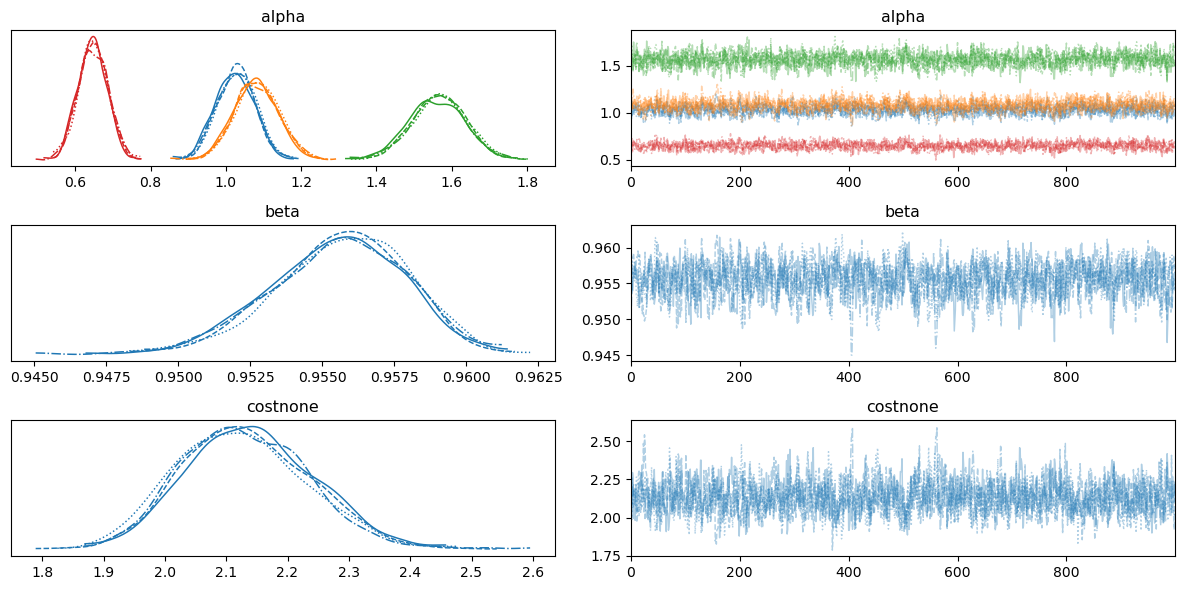

In [21]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_lr_argstrength, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()
plt.show()

In [22]:
save_trace(
    'lr_argstrength', 
    trace_lr_argstrength,
    path_to_folder=folder_exp2_traces
)

Maximin argstrength RSA

In [23]:
with model_maximin_argstrength:
    trace_maximin_argstrength = pm.sample(
        draws=3000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True,
        init='adapt_diag'
    )

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version 

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 671 seconds.
The number of effective samples is smaller than 10% for some parameters.


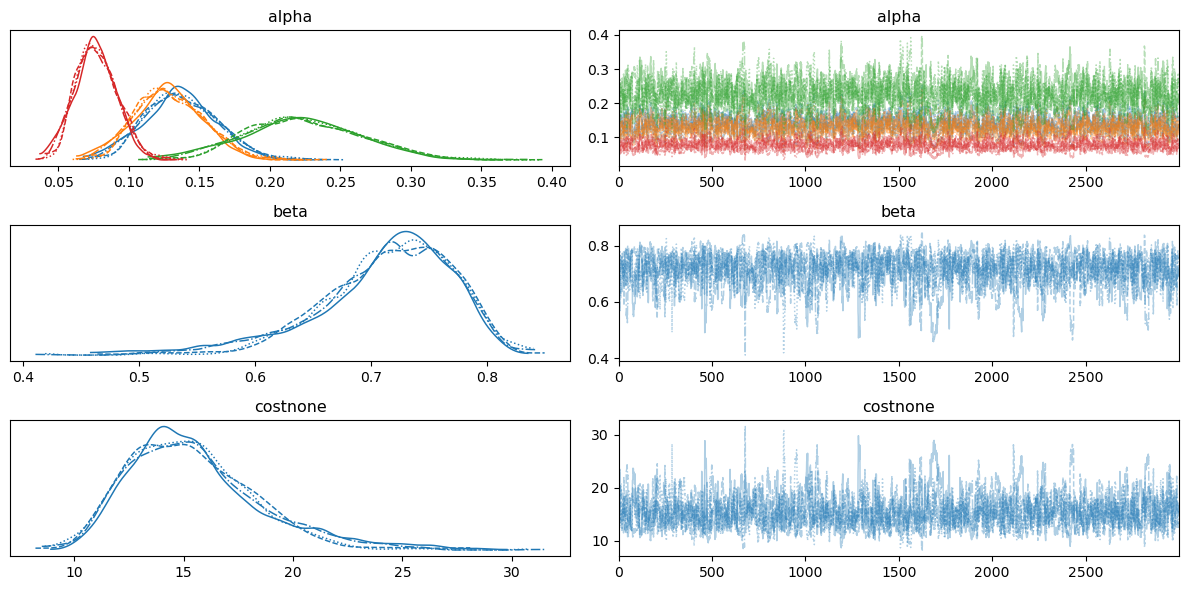

In [24]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_maximin_argstrength, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()
plt.show()

In [25]:
save_trace(
    'maximin_argstrength', 
    trace_maximin_argstrength,
    path_to_folder=folder_exp2_traces
)

S_1 argstrength

In [26]:
with model_prag_argstrength:
    trace_prag_argstrength = pm.sample(
        draws=3000,
        tune=2000,
        target_accept=0.95,
        return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy v

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 444 seconds.
The number of effective samples is smaller than 25% for some parameters.


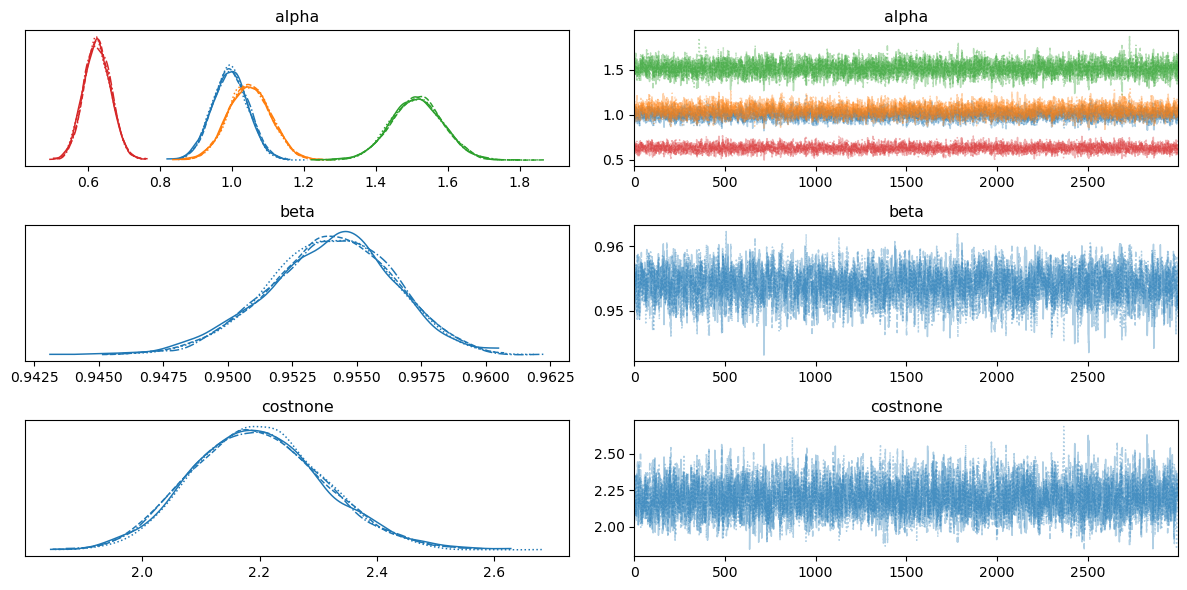

In [27]:
az.plot_trace(trace_prag_argstrength, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()

In [28]:
save_trace(
    'prag_argstrength', 
    trace_prag_argstrength,
    path_to_folder=folder_exp2_traces
)

Nonparametric argstrength RSA

In [29]:
with model_nonparametric_argstrength:
    trace_nonparametric_argstrength = pm.sample(
        draws=1000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy v

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 190 seconds.


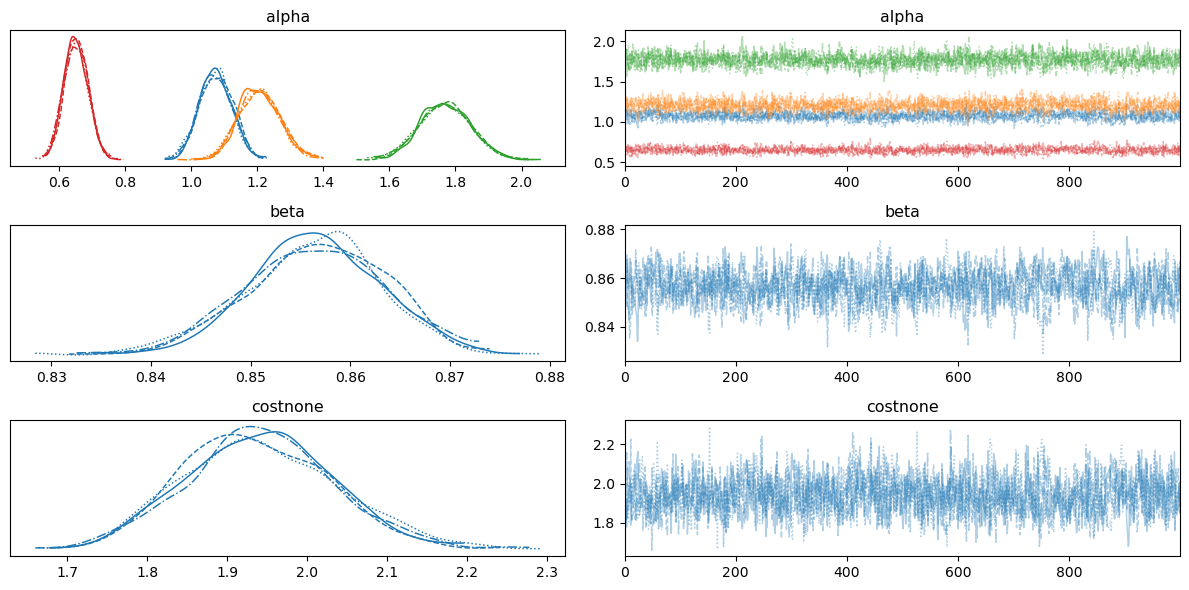

In [30]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_nonparametric_argstrength, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()
plt.show()

In [31]:
save_trace(
    'nonparametric_argstrength', 
    trace_nonparametric_argstrength,
    path_to_folder=folder_exp2_traces
)